# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3


In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

btc_response_data = requests.get(btc_url)
print(btc_response_data)
eth_response_data = requests.get(eth_url)
print(eth_response_data)


<Response [200]>
<Response [200]>


In [5]:
# Fetch current BTC price
btc_data = requests.get(btc_url)
btc_content = btc_data.json()
btc_price = btc_content['data']['1']['quotes']['USD']['price']

# Fetch current ETH price
eth_data = requests.get(eth_url)
eth_content = eth_data.json()
eth_price = eth_content['data']['1027']['quotes']['USD']['price']


In [6]:
# Compute current value of my crypto
my_btc_value = (my_btc * btc_price)
my_eth_value = (my_eth * eth_price)
crypto_value = (my_btc * btc_price) + (my_eth * eth_price)
crypto_value_format = '${:,.2f}'.format(crypto_value)

# Print current crypto wallet balance
print(f'The current balance of this crypto wallet is: {crypto_value_format}')

The current balance of this crypto wallet is: $104,583.33


In [7]:
btc_value_format = '${:,.2}'.format(my_btc_value)
eth_value_format = '${:,.2}'.format(my_eth_value)
print(f'The value of your Bitcoin is: {my_btc_value}')
print(f'The value of your Ethereum is: {my_eth_value}')

The value of your Bitcoin is: 79816.8
The value of your Ethereum is: 24766.529000000002


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [8]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [9]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv('ALPACA_API_KEY')
alpaca_secret_key = os.getenv('ALPACA_SECRET_KEY')

print(f'Alpaca Key type: {type(alpaca_api_key)}')
print(f'Alpaca Secret Key type: {type(alpaca_secret_key)}')

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version='v2')

Alpaca Key type: <class 'str'>
Alpaca Secret Key type: <class 'str'>


In [10]:
# Format current date as ISO format
x = pd.to_datetime('now')
today = pd.Timestamp(x, tz='America/New_York').isoformat

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
df_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today,
    limit=1000
).df

# Preview DataFrame
df_portfolio

AGG                                          \
                             open      high       low    close     volume   
time                                                                        
2017-11-20 00:00:00-05:00  109.23  109.3000  109.1800  109.250  2383640.0   
2017-11-21 00:00:00-05:00  109.39  109.4300  109.2220  109.340  1939152.0   
2017-11-22 00:00:00-05:00  109.40  109.5600  109.3800  109.550  5577462.0   
2017-11-24 00:00:00-05:00  109.50  109.5600  109.4800  109.520  1255510.0   
2017-11-27 00:00:00-05:00  109.53  109.5800  109.4400  109.520  2012690.0   
...                           ...       ...       ...      ...        ...   
2021-11-04 00:00:00-04:00  114.51  114.8400  114.4800  114.770  6026954.0   
2021-11-05 00:00:00-04:00  114.99  115.3199  114.9001  115.240  6641501.0   
2021-11-08 00:00:00-05:00  115.14  115.1500  114.9500  115.010  4696293.0   
2021-11-09 00:00:00-05:00  115.38  115.5000  115.2900  115.330  6955738.0   
2021-11-10 00:00:00-05:00  115.11  115.1400  114.3950  114.535  7595197.0   

                              SPY                                          
                             open    high       low     close      volume  
time                                                                       
2017-11-20 00:00:00-05:00     NaN     NaN       NaN       NaN         NaN  
2017-11-21 00:00:00-05:00  259.18  260.20  259.0900  259.9600  43517856.0  
2017-11-22 00:00:00-05:00  260.03  260.15  259.5700  259.7700  27601406.0  
2017-11-24 00:00:00-05:00  260.28  260.48  260.1600  260.3400  16323543.0  
2017-11-27 00:00:00-05:00  260.41  260.75  260.0000  260.2600  29732937.0  
...                           ...     ...       ...       ...         ...  
2021-11-04 00:00:00-04:00  465.36  467.00  464.9900  466.8600  45729874.0  
2021-11-05 00:00:00-04:00  469.28  470.65  466.9200  468.4900  56119290.0  
2021-11-08 00:00:00-05:00  469.70  470.23  468.2031  468.9700  38945705.0  
2021-11-09 00:00:00-05:00  469.32  469.57  465.8800  467.3800  47198095.0  
2021-11-10 00:00:00-05:00  465.58  467.38  462.0400  464.0824  59945921.0  

[1001 rows x 10 columns]

In [11]:
df_portfolio.columns = ['AGG Open','AGG High','AGG Low','AGG Close','AGG Volume','SPY Open','SPY High','SPY Low','SPY Close','SPY Volume']
df_portfolio

,AGG Open,AGG High,AGG Low,AGG Close,AGG Volume,SPY Open,SPY High,SPY Low,SPY Close,SPY Volume
time,,,,,,,,,,
2017-11-20 00:00:00-05:00,109.23,109.3000,109.1800,109.250,2383640.0,NaN,NaN,NaN,NaN,NaN
2017-11-21 00:00:00-05:00,109.39,109.4300,109.2220,109.340,1939152.0,259.18,260.20,259.0900,259.9600,43517856.0
2017-11-22 00:00:00-05:00,109.40,109.5600,109.3800,109.550,5577462.0,260.03,260.15,259.5700,259.7700,27601406.0
2017-11-24 00:00:00-05:00,109.50,109.5600,109.4800,109.520,1255510.0,260.28,260.48,260.1600,260.3400,16323543.0
2017-11-27 00:00:00-05:00,109.53,109.5800,109.4400,109.520,2012690.0,260.41,260.75,260.0000,260.2600,29732937.0
...,...,...,...,...,...,...,...,...,...,...
2021-11-04 00:00:00-04:00,114.51,114.8400,114.4800,114.770,6026954.0,465.36,467.00,464.9900,466.8600,45729874.0
2021-11-05 00:00:00-04:00,114.99,115.3199,114.9001,115.240,6641501.0,469.28,470.65,466.9200,468.4900,56119290.0
2021-11-08 00:00:00-05:00,115.14,115.1500,114.9500,115.010,4696293.0,469.70,470.23,468.2031,468.9700,38945705.0


In [12]:
# Pick AGG and SPY close prices
agg_close_price = float(df_portfolio['AGG Close']['2021-10-22 00:00:00-4:00'])
spy_close_price = float(df_portfolio['SPY Close']['2021-10-22 00:00:00-4:00'])
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $114.07
Current SPY closing price: $453.13


In [13]:
# Compute the current value of shares
my_spy_value = my_spy * spy_close_price
spy_value_format = '${:,.2f}'.format(my_spy_value)

my_agg_value = my_agg * agg_close_price
agg_value_format = '${:,.2f}'.format(my_agg_value)

total_stock_value = my_spy_value + my_agg_value
total_value_format = '${:,.2f}'.format(total_stock_value)

# Print current value of shares
print(f'The current value of your {my_spy} SPY shares is ${my_spy_value}')
print(f'The current value of your {my_agg} AGG shares is ${my_agg_value}')
print(f'The total value of your stock market investment is ${total_value_format}')

The current value of your 50 SPY shares is $22656.5
The current value of your 200 AGG shares is $22814.0
The total value of your stock market investment is $$45,470.50


### Savings Health Analysis

In [14]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
investment_data = {'Amount':{'Crypto':crypto_value, 'Shares': total_stock_value}}

# Create savings DataFrame
df_value = pd.DataFrame(investment_data)

# Display savings DataFrame
display(df_value)

,Amount
Crypto,104583.329
Shares,45470.500


<AxesSubplot:title={'center':'Composition of Personal Savings'}, ylabel='Amount'>

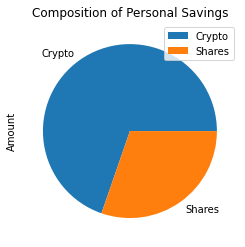

In [15]:
# Plot savings pie chart
df_value.plot.pie(y = 'Amount', title = 'Composition of Personal Savings')

In [16]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3 
emergency_fund_format = '${:,.2f}'.format(emergency_fund)
emergency_fund_format

# Calculate total amount of savings
total_savings = total_stock_value + crypto_value
total_savings_format = '{:,.2f}'.format(total_savings)
total_savings_format

# Validate saving health
if total_savings > emergency_fund:
    print(f'Congrats! Youve saved {total_savings_format} which is {round(total_savings / emergency_fund, 3)} times your recommended Emergency Savings Amount of {emergency_fund_format}!')
elif total_savings < emergency_fund: 
    print(f'Ruh roh! You need to save {emergency_fund - total_savings} in order to be safe! Run for your life!')
else: 
    print(f'Youre right on the money with your savings, but what is theres a bigger emergency?!')

Congrats! Youve saved 150,053.83 which is 4.168 times your recommended Emergency Savings Amount of $36,000.00!


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [17]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp(x, tz='America/New_York').isoformat()

In [18]:
# Get 5 years' worth of historical data for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
# YOUR CODE HERE!

tickers = ['SPY', 'AGG']
timeframe = '1D'
df_stock_data = alpaca.get_barset(
    tickers, 
    timeframe, 
    start = start_date, 
    end = end_date,
    limit = 1000
).df

# Display sample data
df_stock_data.head()

AGG                                       SPY  \
                             open    high      low   close   volume    open   
time                                                                          
2017-11-21 00:00:00-05:00  109.39  109.43  109.222  109.34  1939152  259.18   
2017-11-22 00:00:00-05:00  109.40  109.56  109.380  109.55  5577462  260.03   
2017-11-24 00:00:00-05:00  109.50  109.56  109.480  109.52  1255510  260.28   
2017-11-27 00:00:00-05:00  109.53  109.58  109.440  109.52  2012690  260.41   
2017-11-28 00:00:00-05:00  109.59  109.63  109.470  109.50  3323300  260.76   

                                                             
                             high     low   close    volume  
time                                                         
2017-11-21 00:00:00-05:00  260.20  259.09  259.96  43517856  
2017-11-22 00:00:00-05:00  260.15  259.57  259.77  27601406  
2017-11-24 00:00:00-05:00  260.48  260.16  260.34  16323543  
2017-11-27 00:00:00-05:00  260.75  260.00  260.26  29732937  
2017-11-28 00:00:00-05:00  262.90  258.40  262.85  57806500

In [19]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
mc_spy_agg = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.6, .4],
    num_simulation = 1000,
    num_trading_days = 252*30)


In [20]:
# Printing the simulation input data
mc_spy_agg.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/alex/Desktop/upenn_fintech_all/05-APIs/Homework/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.995803,1.012548,1.001983,1.004443,0.994815,0.992261,0.999307,0.999603,1.004491,0.999880,...,1.005092,0.994887,0.999409,1.003435,1.008208,0.995645,1.004120,0.987214,0.993392,1.001389
2,0.994921,1.013181,1.012222,1.013590,0.989902,0.997225,1.001444,1.003205,1.008390,0.991540,...,1.000384,1.002146,0.991429,1.009927,1.003450,0.996787,1.007136,0.982080,1.001423,1.004940
3,1.001227,1.018714,1.007226,1.007012,0.993568,1.000068,0.999097,1.001415,1.009611,0.994428,...,0.996590,1.001586,0.991425,1.007024,0.999556,1.000129,1.007565,0.974357,1.003834,1.012314
4,1.001324,1.021509,1.006118,1.007038,0.991769,1.003996,0.999849,0.996276,0.998169,0.991961,...,1.004144,0.997921,0.988463,1.001317,0.990551,1.005987,1.019119,0.976610,1.002458,1.019889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,11.589017,8.953134,3.973538,15.528026,19.378069,13.586689,3.374751,10.838313,18.354282,8.514658,...,6.301847,9.958251,5.177524,5.340202,14.169207,14.602359,11.089363,15.502702,4.195987,5.757085
7557,11.658507,8.946007,4.013291,15.667597,19.454127,13.435020,3.330956,10.858667,18.327983,8.549306,...,6.285208,9.893474,5.129954,5.332198,14.216899,14.636723,11.150448,15.508741,4.208174,5.751000
7558,11.638322,8.916941,4.012215,15.747164,19.501398,13.339052,3.344213,10.861541,18.344138,8.468364,...,6.240771,9.797646,5.153236,5.360187,14.173732,14.553750,11.083648,15.483765,4.208612,5.771967
7559,11.660391,8.956215,4.014161,15.814123,19.437703,13.284973,3.335919,10.888861,18.169415,8.520773,...,6.216885,9.870958,5.195694,5.385712,14.058002,14.719486,11.058090,15.547305,4.195771,5.721678


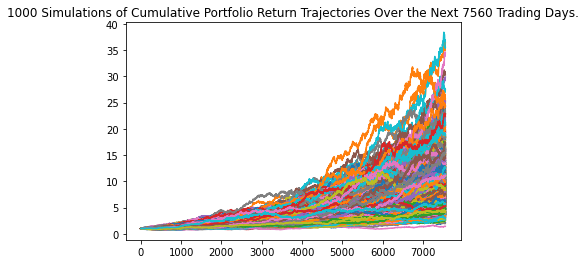

In [21]:
# Plot simulation outcomes
line_plot = mc_spy_agg.plot_simulation()

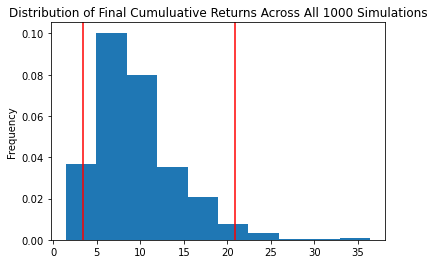

In [22]:
# Plot probability distribution and confidence intervals
dist_plot = mc_spy_agg.plot_distribution()

### Retirement Analysis

In [23]:
# Fetch summary statistics from the Monte Carlo simulation results
even_tbl = mc_spy_agg.summarize_cumulative_return()

# Print summary statistics
print(even_tbl)

count           1000.000000
mean               9.597097
std                4.733752
min                1.439219
25%                6.276989
50%                8.591403
75%               11.810578
max               36.414086
95% CI Lower       3.456803
95% CI Upper      20.873658
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [24]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(even_tbl[8] * initial_investment, 2)
ci_upper = round(even_tbl[9] * initial_investment, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $69136.06 and $417473.16


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [25]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(even_tbl[8] * initial_investment, 2)
ci_upper = round(even_tbl[9] * initial_investment, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $103704.09 and $626209.75


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [26]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [27]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [28]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [29]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [30]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [31]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results


### Ten Years Retirement Option

In [32]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [33]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [34]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [35]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [36]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [37]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
